# მოდელისთვის საჭირო ბიბლიოთეკების იმპორტი

In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


# მონაცემების დამუშავება და ანალიზი

In [90]:
df = pd.read_csv("train.csv")
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [91]:
#1.1 
#ჩანაწერებიოს რაოდენობა
len(df)

1460

In [92]:
# მახასიათებლების რაოდენობა
len(df.columns)

81

In [93]:
# კატეგორიულის და რიცხვითი მონაცემების რაოდენობა
num_numeric = df.select_dtypes(include=['int64', 'float64']).shape[1]
num_categorical = df.select_dtypes(include=['object', 'category']).shape[1]
num_numeric, num_categorical


(38, 43)

In [105]:
# დუბლიკატების შემოწმება და წაშლა
print("დუბლიკატების რაოდენობა:", df.duplicated().sum())
df = df.drop_duplicates()

# გამოტოვებული მნიშვნელობების შემოწმება
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nსვეტები გამოტოვებული მნიშვნელობებით:")
print(missing)

# გამოტოვებული მნიშვნელობების შევსება
# რიცხვითი სვეტები -> მედიანით

imputer = SimpleImputer(strategy="mean")  # ან "median", "most_frequent"
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# კატეგორიული სვეტები ყველაზე ხშირი მნიშვნელობით (mode)
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

# შემოწმება — დარჩა თუ არა გამოტოვებული მნიშვნელობები
print("\nსულ გამოტოვებული მნიშვნელობები:", df.isnull().sum().sum())

დუბლიკატების რაოდენობა: 0

სვეტები გამოტოვებული მნიშვნელობებით:
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

სულ გამოტოვებული მნიშვნელობები: 348


In [95]:
# Encoding
X_encoded = pd.get_dummies(X, drop_first=True, dtype=int)
X_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,1,0,0,0,1,0


In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [100]:
imputer = SimpleImputer(strategy="mean")  # ან median, most_frequent
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# მოდელების შექმნა

D:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


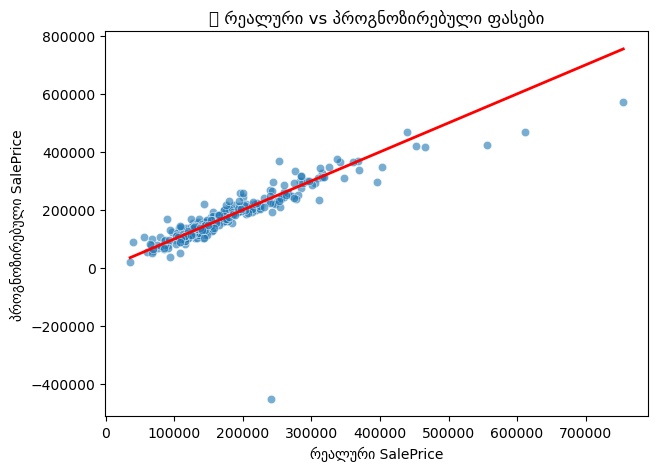

In [101]:
#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("რეალური SalePrice")
plt.ylabel("პროგნოზირებული SalePrice")
plt.title("📈 რეალური vs პროგნოზირებული ფასები")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()

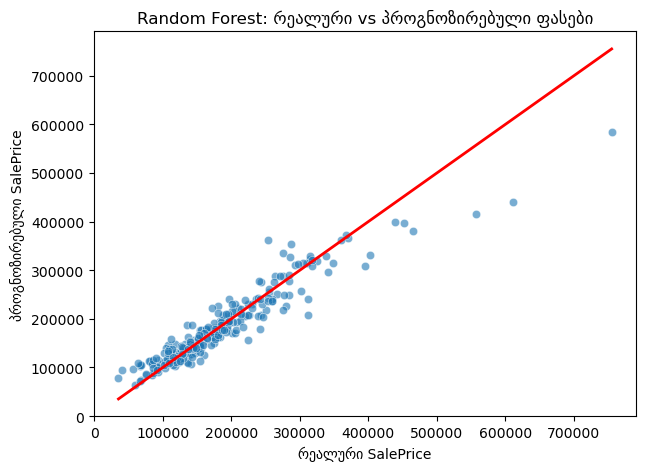

In [102]:
#Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=None,   
    n_jobs=-1         
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("რეალური SalePrice")
plt.ylabel("პროგნოზირებული SalePrice")
plt.title("Random Forest: რეალური vs პროგნოზირებული ფასები")
plt.show()

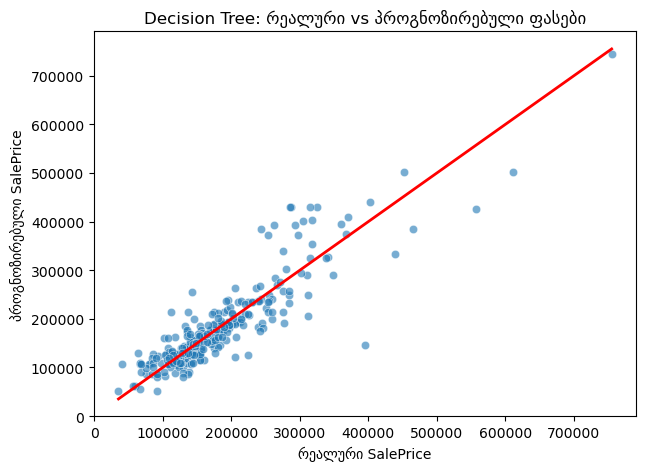

In [78]:
#Decision Tree Regressor
model = DecisionTreeRegressor(
    max_depth=None, 
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("რეალური SalePrice")
plt.ylabel("პროგნოზირებული SalePrice")
plt.title("Decision Tree: რეალური vs პროგნოზირებული ფასები")
plt.show()

# მოდელების პროგნოზი

In [85]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [84]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [83]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [86]:
models = {
    "Linear Regression": (y_test, y_pred_lr),
    "Decision Tree": (y_test, y_pred_dt),
    "Random Forest": (y_test, y_pred_rf)
}


In [89]:
for name, (y_true, y_pred) in models.items():
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"📌 {name}")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.3f}")
    print("-"*30)

📌 Linear Regression
MAE: 20493.24
MSE: 2429160460.80
RMSE: 49286.51
R² Score: 0.683
------------------------------
📌 Decision Tree
MAE: 26453.88
MSE: 1678205406.64
RMSE: 40965.91
R² Score: 0.781
------------------------------
📌 Random Forest
MAE: 17649.76
MSE: 834159353.25
RMSE: 28881.82
R² Score: 0.891
------------------------------


In [ ]:
#ამ ამოცანისთვის რეკომენდებულია Random Forest, რადგან იგი ერთდროულად ზუსტად პროგნოზირებს,
#ოპტიმალურია nonlinear და კატეგორიული მახასიათებლების შემთხვევაშიც, 
#და უზრუნველყოფს უფრო სტაბილურ შედეგს ახალ მონაცემებზე.